In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle

In [2]:
df = wrangle.wrangle_telco()
df.head()

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75


1. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [3]:
def plot_variable_pairs(df):
    g = sns.PairGrid(df)
    g.map_diag(sns.distplot)
    g.map_offdiag(sns.regplot)
    return g

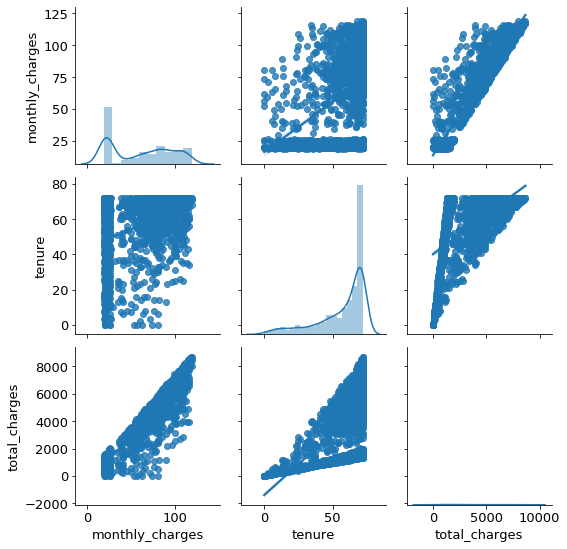

In [4]:
plot_variable_pairs(df)

2. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature `tenure_years`, in complete years as a customer.

In [5]:
def months_to_years(df):
    import math
    df['tenure_years'] = df.tenure.apply(lambda x: math.floor(x/12))
    return df

In [6]:
months_to_years(df).head()

,monthly_charges,tenure,total_charges,tenure_years
0,109.70,71,7904.25,5
1,84.65,63,5377.80,5
2,90.45,65,5957.90,5
3,45.20,54,2460.55,4
4,116.80,72,8456.75,6


3. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [7]:
def plot_categorical_and_continuous_vars(df, column_cont, column_cat):
    plt.rc('font', size=13)
    plt.rc('figure', figsize=(13,9))
    plt.subplot(311)
    plot1 = sns.boxplot(data=df, y=column_cont, x=column_cat)
    plt.subplot(312)
    plot2 = sns.barplot(data=df, y=column_cont, x=column_cat)
    plt.subplot(313)
    plot3 = sns.swarmplot(data=df, y=column_cont, x=column_cat)
    return plot1, plot2, plot3

(<matplotlib.axes._subplots.AxesSubplot at 0x7f89e6276e50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f89e6775790>)

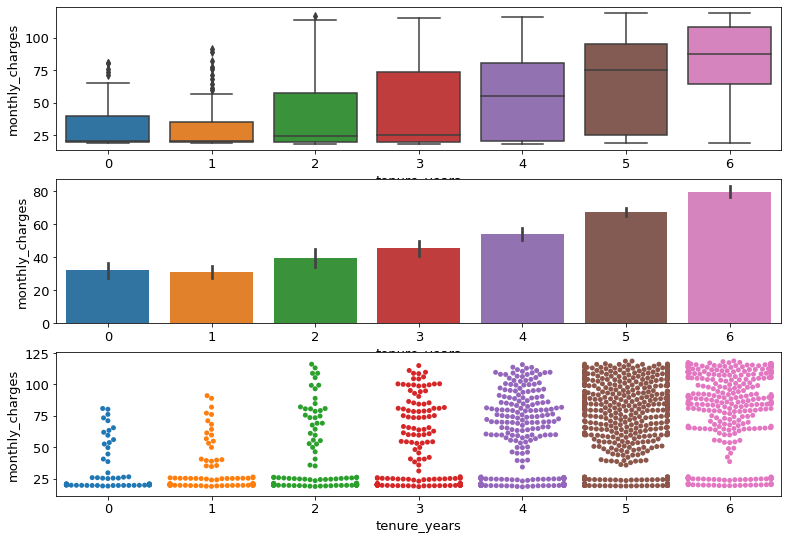

In [8]:
plot_categorical_and_continuous_vars(df, df.monthly_charges, df.tenure_years)

4. Save the functions you have written to create visualizations in a file named `explore.py`. Rewrite your notebook code so that you are using the functions imported from this file.

In [9]:
import explore

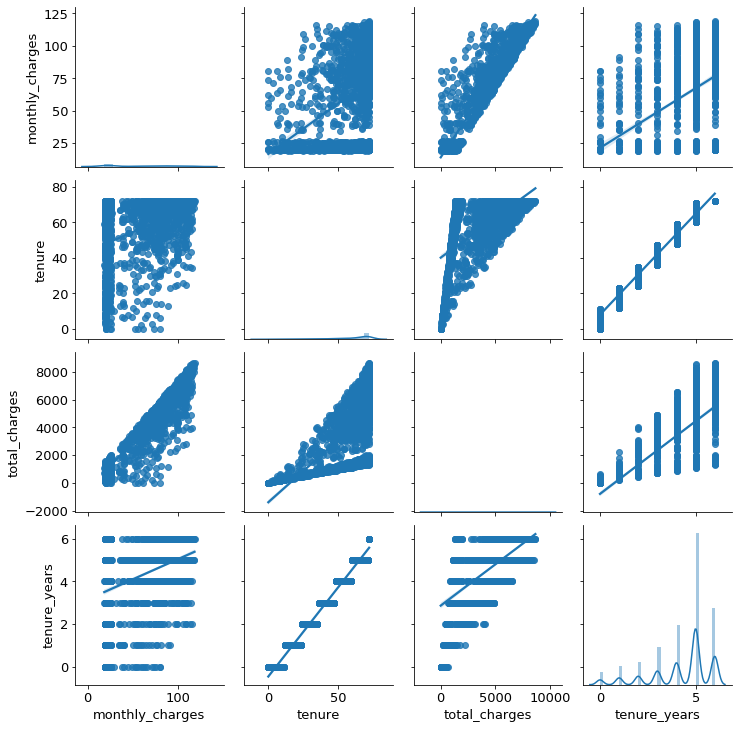

In [10]:
explore.plot_variable_pairs(df)

In [11]:
explore.months_to_years(df)

,monthly_charges,tenure,total_charges,tenure_years
0,109.70,71,7904.25,5
1,84.65,63,5377.80,5
2,90.45,65,5957.90,5
3,45.20,54,2460.55,4
4,116.80,72,8456.75,6
...,...,...,...,...
1690,24.40,71,1725.40,5
1691,19.25,67,1372.90,5
1692,19.75,46,856.50,3
1693,67.85,67,4627.65,5


(<matplotlib.axes._subplots.AxesSubplot at 0x7f89e75e9f10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f89e75ae790>)

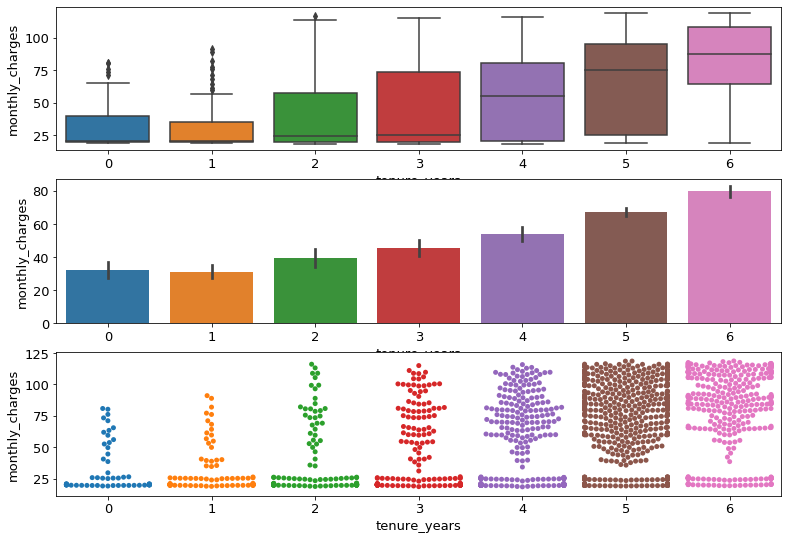

In [12]:
explore.plot_categorical_and_continuous_vars(df, df.monthly_charges, df.tenure_years, None)

5. Explore your dataset with any other visualizations you think will be helpful.
 

In [13]:
# higher classes pay more monthly
df['payment_class'] = pd.qcut(df.monthly_charges, q=4, labels=['1', '2', '3', '4'])
df.sample(5, random_state=35)

,monthly_charges,tenure,total_charges,tenure_years,payment_class
1298,40.65,36,1547.35,3,2
473,84.05,72,6052.25,6,3
224,19.35,66,1240.80,5,1
633,67.25,63,4234.15,5,3
81,24.75,65,1715.10,5,2


In [14]:
def plot_categorical_vars(df, column1, column2, normalized_arg):
    ct = pd.crosstab(column1, column2, normalize=normalized_arg)
    htmp= sns.heatmap(ct, cmap='Greens', annot=True, fmt='.1%')
    return htmp

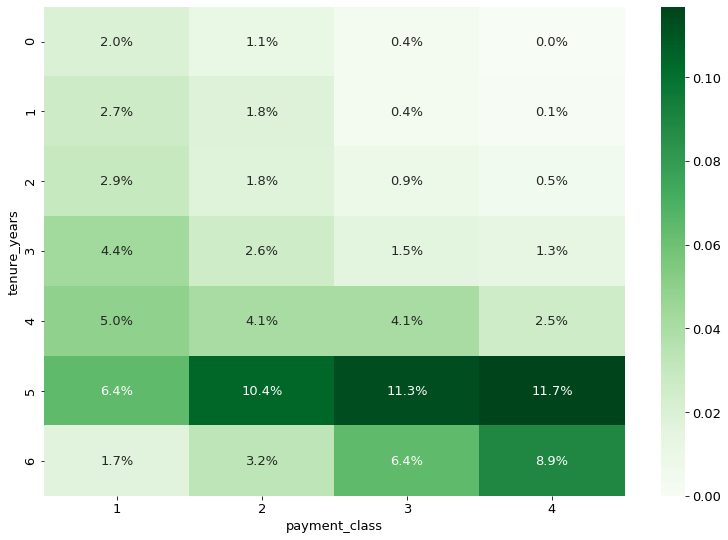

In [15]:
plot_categorical_vars(df, df.tenure_years, df.payment_class, True)

6. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.

In [16]:
import acquire
import prepare
mall = pd.DataFrame(acquire.get_mall_data())
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [18]:
mall.nunique()

customer_id       200
gender              2
age                51
annual_income      64
spending_score     84
dtype: int64

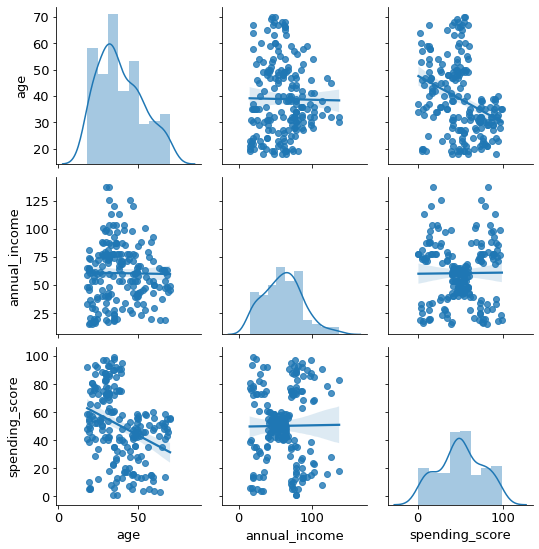

In [19]:
explore.plot_variable_pairs(mall[['age', 'annual_income', 'spending_score']])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f89e87d6410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f89e92bcf10>)

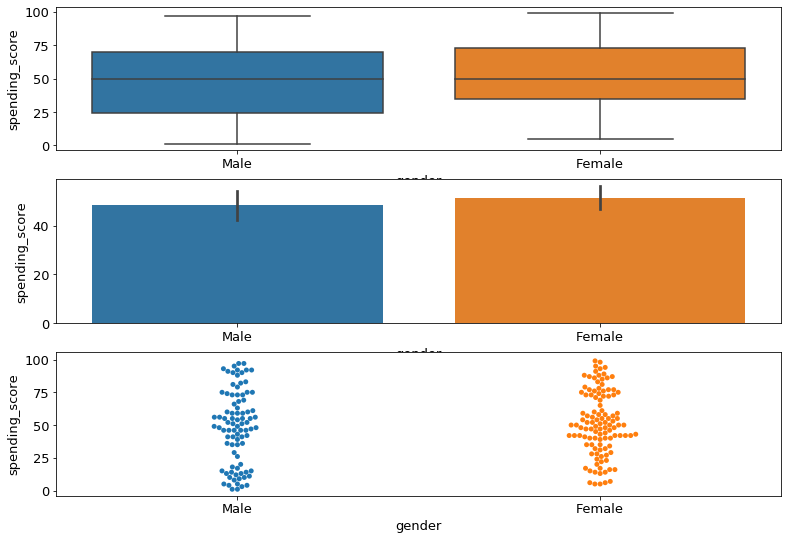

In [20]:
explore.plot_categorical_and_continuous_vars(mall, mall.spending_score, mall.gender, None)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f89e71b5a10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f89e95ef090>)

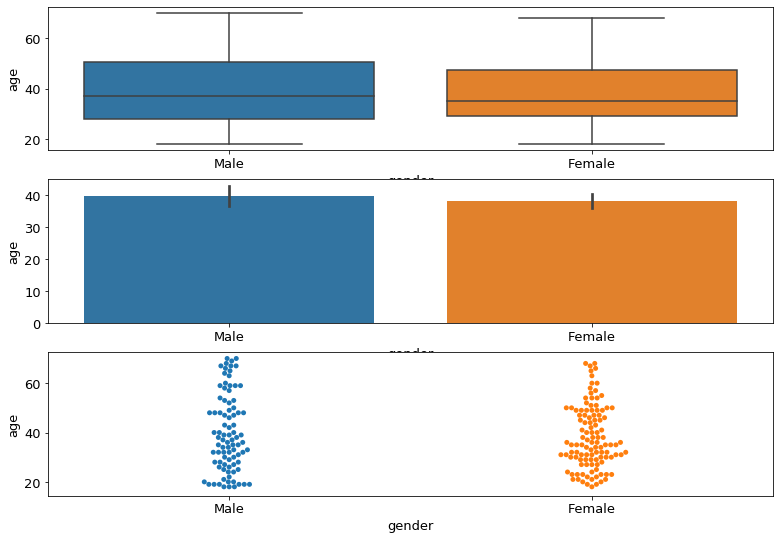

In [22]:
explore.plot_categorical_and_continuous_vars(mall, mall.age, mall.gender, None)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f89e9931d50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f89ea0faad0>)

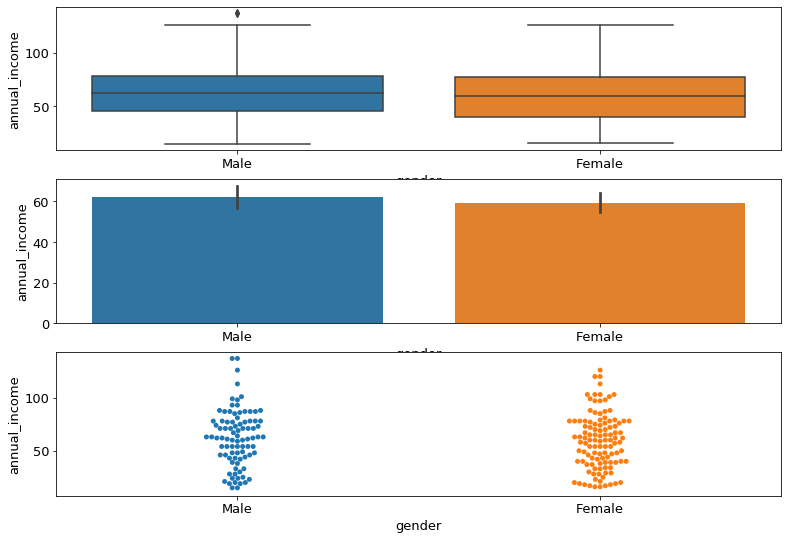

In [25]:
explore.plot_categorical_and_continuous_vars(mall, mall.annual_income, mall.gender, None)

In [26]:
mall.drop(columns='customer_id').describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [38]:
mall['age_group'] = pd.cut(mall.age, bins=[0, 24, 36, 45, 59, 70], labels=['young adults', 'mature adults', 'middle-aged', 'older folks', 'elderly'])
mall.sample(5, random_state=35)

,customer_id,gender,age,annual_income,spending_score,age_group
136,137,Female,44,73,7,middle-aged
133,134,Female,31,72,71,mature adults
130,131,Male,47,71,9,older folks
142,143,Female,28,76,40,mature adults
154,155,Female,47,78,16,older folks


In [39]:
mall.age_group.value_counts()

mature adults    69
older folks      46
young adults     35
middle-aged      30
elderly          20
Name: age_group, dtype: int64

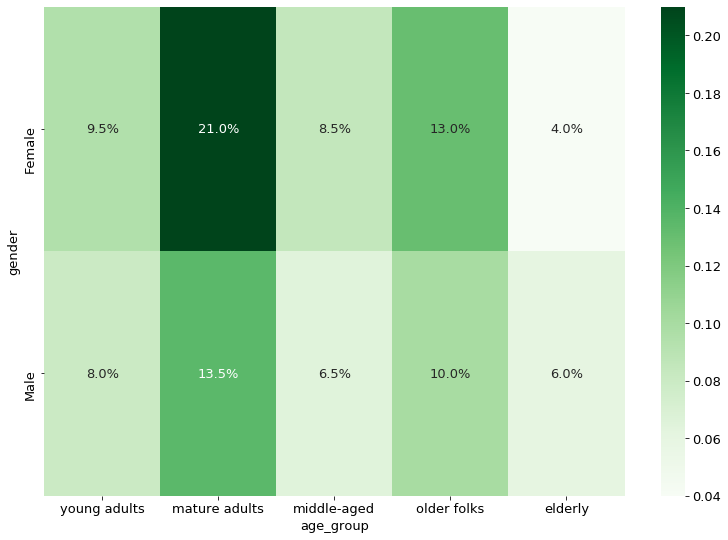

In [41]:
plot_categorical_vars(mall, mall.gender, mall.age_group, True)